In [1]:
import pandas as pd
# get data
df = pd.read_csv('USA_Housing.csv').dropna()

df.drop(['Address'], axis=1, inplace=True)

y = df.iloc[:, -1].values
x = df.iloc[:, :-1].values
print(y.shape, x.shape)


(5000,) (5000, 5)


In [2]:
# 80% as train and 20% as test
x_train, x_test = x[ :int(len(x)*0.8)], x[int(len(x)*0.8): ]
y_train, y_test = y[ :int(len(x)*0.8)], y[int(len(x)*0.8): ]
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(4000, 5) (1000, 5)
(4000,) (1000,)


In [3]:
# get model and predict
from Gradient_Dcision_Tree import GradientBoostingTree
model = GradientBoostingTree(tol=3)
model.fit(x_train, y_train)

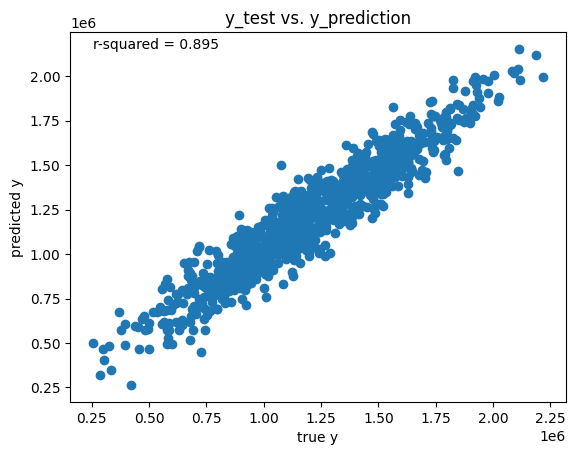

In [4]:
# test model performance
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
import numpy as np

pred = model.predict(x_test)

r2 = r2_score(y_test, pred)

plt.title('y_test vs. y_prediction')
plt.xlabel('true y')
plt.ylabel('predicted y')
plt.annotate("r-squared = {:.3f}".format(r2), (min(y_test), max(pred)))
plt.scatter(y_test, pred)

plt.show()
